## Importing the Datasets

In [81]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # For creating interactive plots

In [82]:
# Libraries for Modellling & Feature Selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import mutual_info_classif as MIC

In [83]:
import warnings
warnings.filterwarnings('ignore')

### Context
The dataset is the details of the customers in a company.

### Content
The column are about it's estimated salary, age, sex, etc. Aiming to provide all details about an employee.

In [84]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Dropping RowNumber , CustomerID , Surname

In [85]:
df.drop(["RowNumber","CustomerId","Surname"],axis = 1,inplace = True)

In [86]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


### Missing Values

In [88]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### EDA

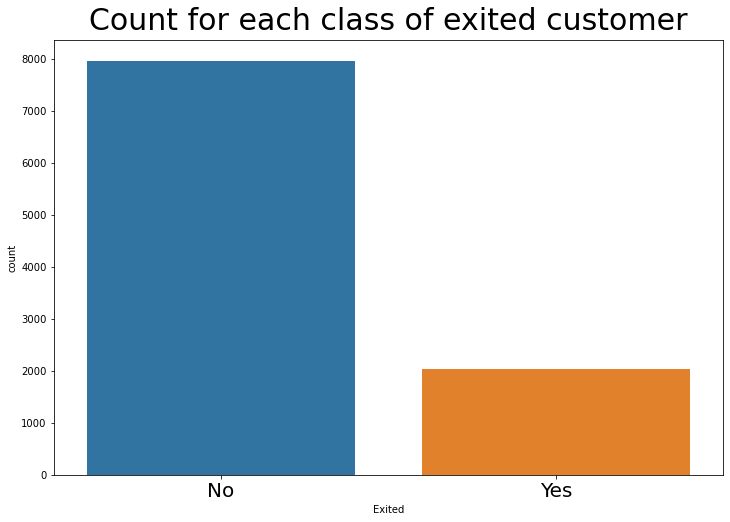

In [89]:
#Count for each class of exited customer
df.Exited.value_counts()
plt.figure(figsize=(12, 8))
exited_plot = sns.countplot(x=df.Exited)
exited_plot.set_title('Count for each class of exited customer',
                      fontsize=30,
                      pad=10)
exited_plot.set_xticklabels(['No', 'Yes'], fontsize=20)
plt.show()

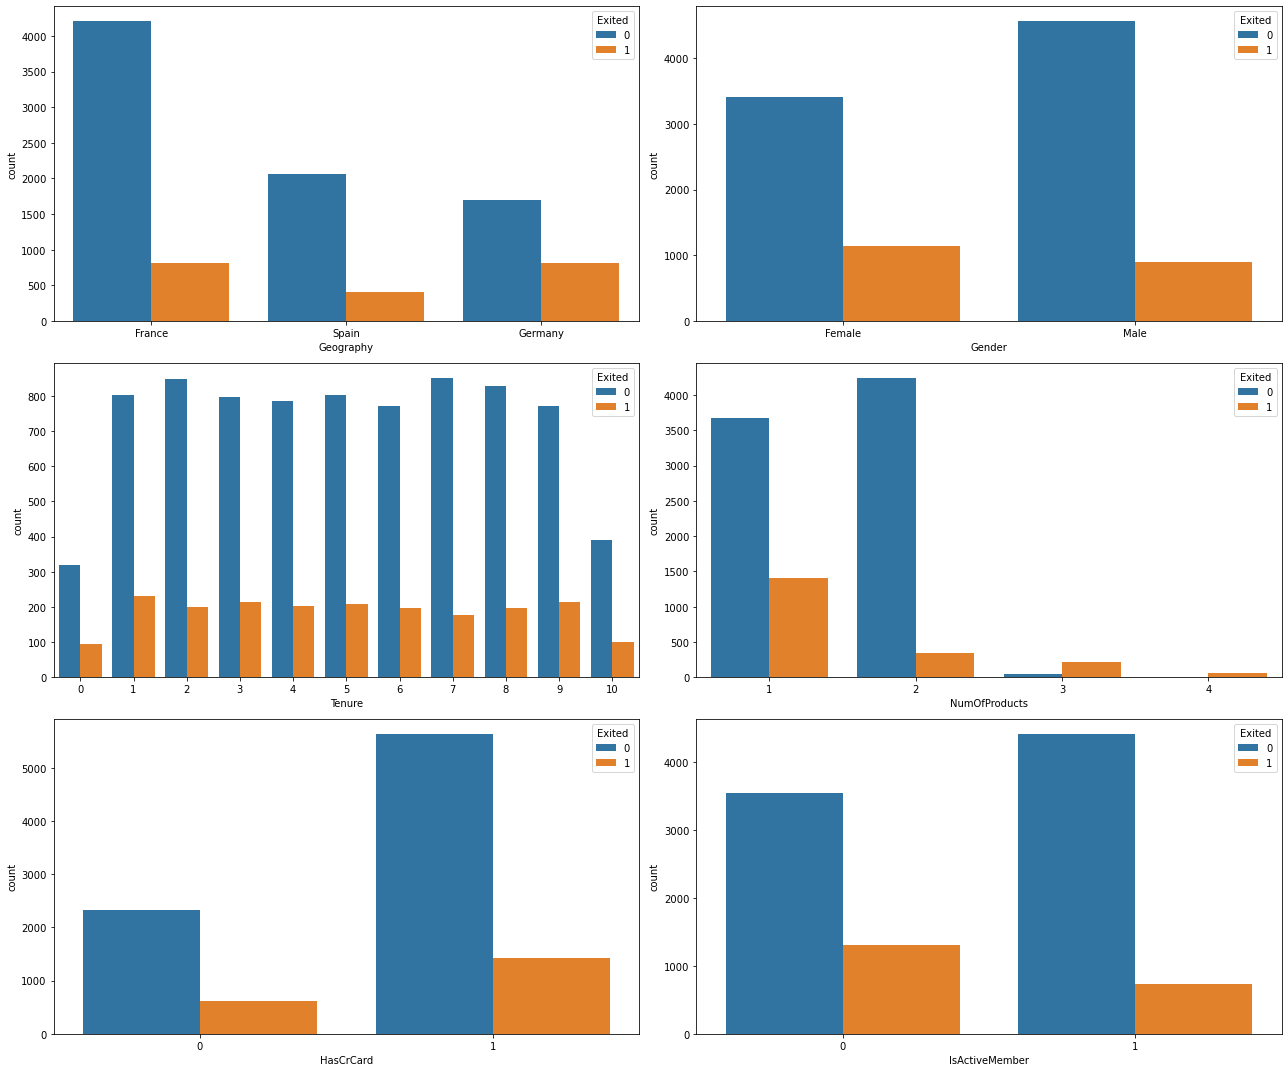

In [90]:
#COmparision Using Count Plot
fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot('Geography', hue = 'Exited', data = df, ax = ax[0][0])
sns.countplot('Gender', hue = 'Exited', data = df, ax = ax[0][1])
sns.countplot('Tenure', hue = 'Exited', data = df, ax = ax[1][0])
sns.countplot('NumOfProducts', hue = 'Exited', data = df, ax = ax[1][1])
sns.countplot('HasCrCard', hue = 'Exited', data = df, ax = ax[2][0])
sns.countplot('IsActiveMember', hue = 'Exited', data = df, ax = ax[2][1])

plt.tight_layout()
plt.show()

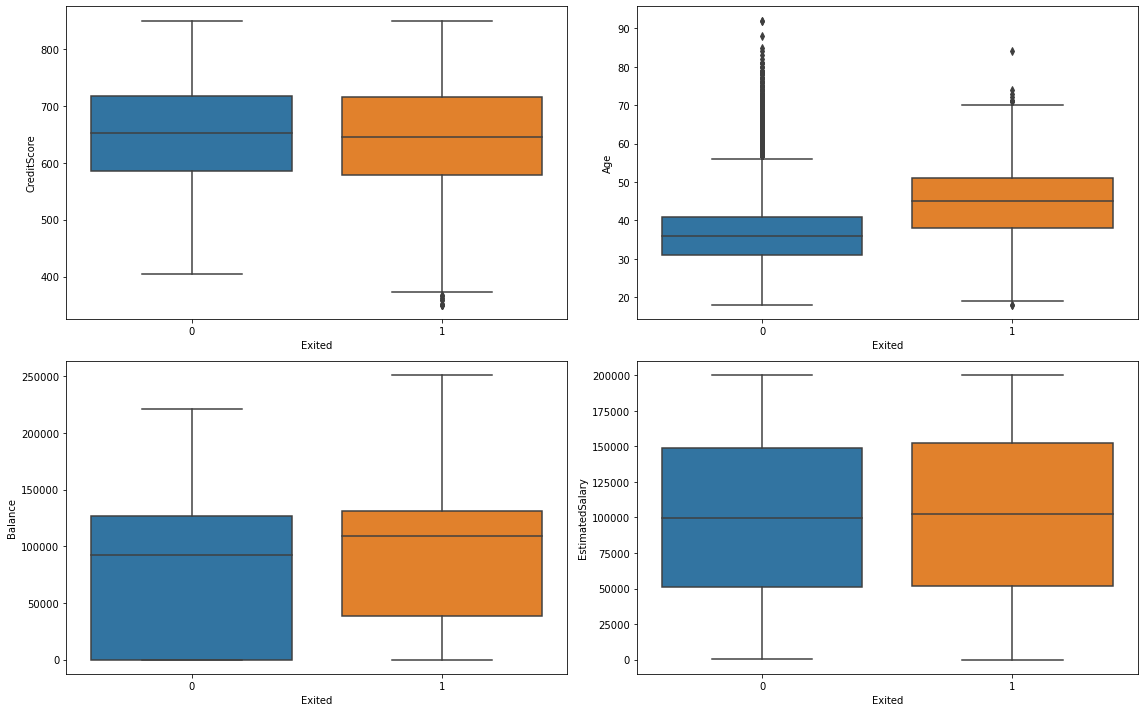

In [91]:
#Boxbolot based Variable COmparision
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])

plt.tight_layout()
plt.show()

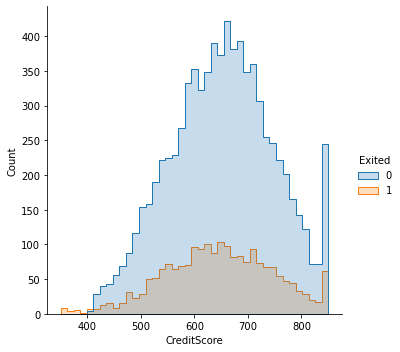

In [92]:
# COmparing the Distribution of the Data
sns.displot(df, x="CreditScore", hue="Exited", element="step")

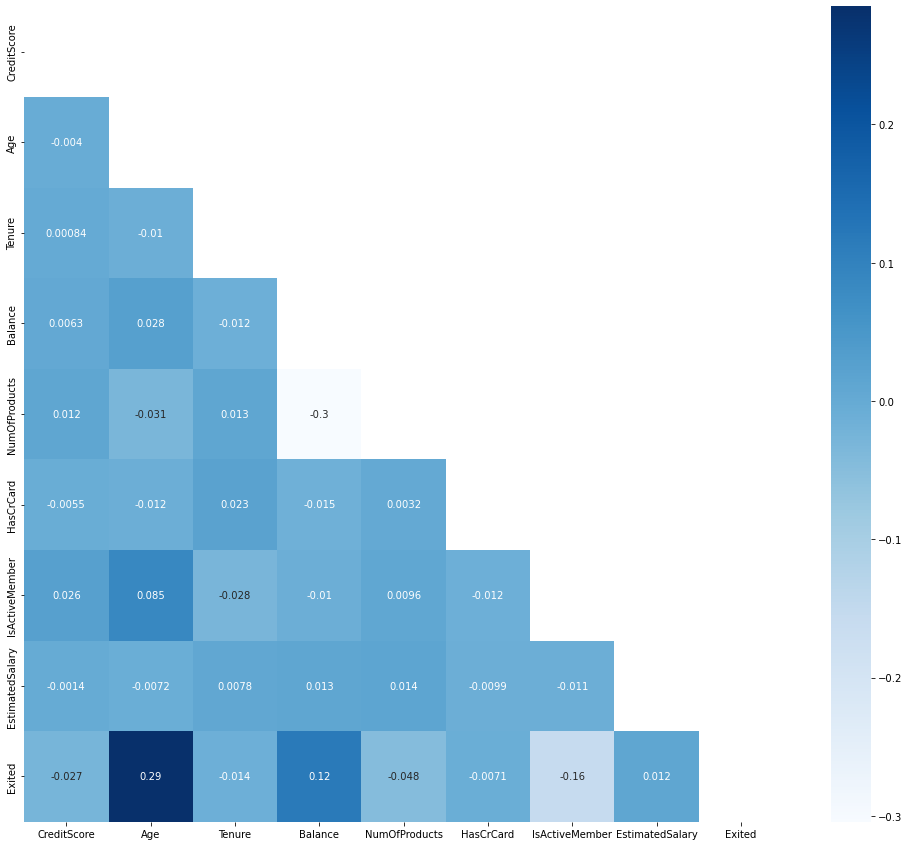

In [93]:
# Correlation Plot : TO test for multicollinearity     : Multicolllinearty as a Fearure Selection Method
plt.figure(figsize=(17, 15))

corr_mask = np.triu(df.corr())
h_map = sns.heatmap(df.corr(), mask=corr_mask, cmap='Blues',annot=True)
plt.show()

#### Feature Selection Based on Target & Feature

- From the boxplot we can see that credit score for both exited and not exited are same. So this varibale may not be able to create good decision boundaries.
- MultiCollinearity doesnt exist as noe of the two independent variables have high correlation

In [94]:
df.drop(["CreditScore"],axis=1,inplace=True)

### Seperating Independent and Dependent Feature

In [95]:
Y  = df["Exited"]
X = df.drop(["Exited"],axis=1)

In [96]:
## Encoding Categorical Columns
X['Geography'] = X['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
X['Gender'] = X['Gender'].map({'Male' : 0, 'Female' : 1})

In [97]:
X.shape

(10000, 9)

### Entropy Based Feature Selection

In [98]:
mi_score = MIC(X,Y)
mi_score

array([0.01756461, 0.00473645, 0.07002521, 0.00473808, 0.00841287,
       0.06494458, 0.        , 0.01061439, 0.00270893])

In [99]:
selected_index = list(np.where(mi_score >0.005)[0])
X1 = X.iloc[:,selected_index]
X1.head()

,Geography,Age,Balance,NumOfProducts,IsActiveMember
0,0,42,0.00,1,1
1,2,41,83807.86,1,1
2,0,42,159660.80,3,0
3,0,39,0.00,2,0
4,2,43,125510.82,1,1


In [100]:
print("Removed Columns are : ", set(X.columns) - set(X1.columns))

Removed Columns are :  {'Tenure', 'Gender', 'HasCrCard', 'EstimatedSalary'}


### Model Based  : Using Random Forest

In [101]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X1,Y)

RandomForestClassifier(random_state=0)

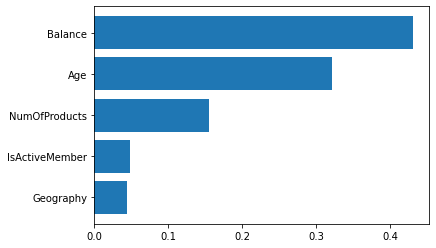

In [102]:
# Plotting the Feature Importance
features = X1.columns
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

- Is ActiveMember & Geography has least feature Importance; so we can remove them

In [103]:
X1.drop(["IsActiveMember","Geography"],axis=1,inplace=True)

In [104]:
X1.head()

,Age,Balance,NumOfProducts
0,42,0.00,1
1,41,83807.86,1
2,42,159660.80,3
3,39,0.00,2
4,43,125510.82,1


### Data Standardization

In [105]:
sc = StandardScaler()
X1 = sc.fit_transform(X1)

### Train Test Split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.2, random_state=42)

In [107]:
X_train.shape

(8000, 3)

### Fitting Logistic Regression Model

In [108]:
#Intitalizing the Model
model_LR = LogisticRegression()

#Fitting the Model
model_LR.fit(X_train, y_train)

LogisticRegression()

In [109]:
# Prediction
y_prob = model_LR.predict_proba(X_test)[:,1] 
y_pred = np.where(y_prob > 0.5, 1, 0)

In [110]:
confusion_matrix = confusion_matrix(y_test,y_pred)

confusion_matrix

array([[1551,   56],
       [ 368,   25]], dtype=int64)

In [111]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.788

In [114]:
## ROC AUC Score & Curve
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc 

0.7451298469957296

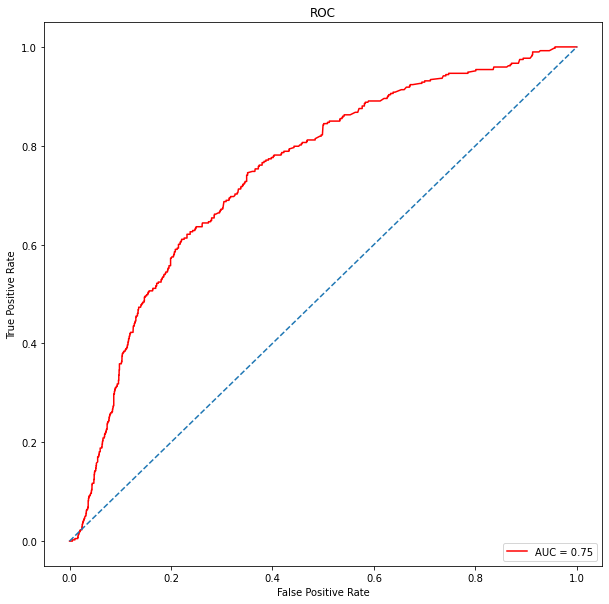

In [115]:
plt.figure(figsize=(10,10))
plt.title('ROC')

plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3 style="text-align:center;">&rarr; <span style="color:blue;">Thank You<span> &larr;